# Data Exploration Bootcamp

We created this tutorial from a live notebook. But sadly, it is not interactive! 

To really understand our explanations, we encourage you to practice! Nevertheless, as we are using new modules that are not installed by default in the ressources we have provided you with previously, this content will not be available for interactivity. We're are very sorry for this! but after all, this is a prototype :)


## Getting started with Pandas

Pandas is probably the most used Python package for Data Exploration. This package includes many tools for manipulating tabular data and allows fast exploration of (very) ugly data sets.

As we discussed before, the advantage of Python is to be open source and to be well suited to general purposes. Adapted to data exploration, pandas can deal with many data sources and multiples entries (compared to Excel for instance).

During the data exploration bootcamp, you will use pandas most of the time. So, you must use the following convention to import the package:

In [1]:
import pandas as pd

### Introduction to *Series*

A series is one-dimensinal array, equivalent to a single column from Excel. The main difference with excel is that all values from the Series can be identified through a label called *index*. This index can be an integer, like the number of the line, or can be any numpy-object (a string or a date for instance).

Let's see the role of the index via the creation of a simple Series:

In [2]:
new_series = pd.Series([1,2,3,4,5])

By default, the index is the number of the line (from 0 to $n-1$, with $n$ the length of the Series).

In [3]:
## to display the series, we just have to write its name and execute
new_series

0    1
1    2
2    3
3    4
4    5
dtype: int64

We can see our five values on the right, each value is identified via its index on the left.
The index could have been different and string-based for instance.

In [4]:
new_series.index = ['one','two','three','four','five']

In [5]:
new_series

one      1
two      2
three    3
four     4
five     5
dtype: int64

#### Localize values based on their index or their position
The advantage of the index is that it allows you to **localize** specific values. For instance, if we want to get the value identified by the index $three$, we can proceed as follows:

In [6]:
new_series.loc['three']

3

Then we obtain the value $3$ since its index is $three$.

In fact, $.loc(label)$ returns **all** the values with the index *label*. Then, for the case where we would have set the same label multiple times, we would have obtained the sub-Series containing all the values

In [7]:
new_series_2 = pd.Series([1,2,3,4,5], index = ['one','three','three','four','five'])
new_series_2.loc['three']

three    2
three    3
dtype: int64

Notice that the command $.loc$ is only **label-based**. That means that for instance if we want the *i-th* value of the Series, or the last one *n-th*, we need the specific the label associated to these values.

If we want a specific position on a Series, we must use the command $.iloc$ that is integer-position based. But, beware of the position of integers that are from 0 to $n-1$ with $n$ the lengh of the series.

For instance, if we want the 3rd value of our Series, we would write:

In [8]:
new_series.iloc[2]

3

The last element is obtained by executing ($iloc$'s indexing is toroidal):

In [9]:
new_series.iloc[-1]

5

And that works for any label-type, whereas the command $.loc$ would have failed:

Finally, some commands are useful to have an overview of the series we are working on:
- head(n) displays the $n$ first elements of the series
- tail(n) displays the $n$ last elements
- sample(n) returns $n$ random values of the series

In [10]:
new_series.head(2)

one    1
two    2
dtype: int64

In [11]:
new_series.tail(2)

four    4
five    5
dtype: int64

In [12]:
new_series.sample(2)

three    3
one      1
dtype: int64

#### Basic statistics and counting 

A key advantage of pandas data structure is that you can apply many typical operations on your series.

For instance, you can compute basic statistics with the associated commands *.mean()*, *.std()* or *.min()*. We will list many of those corresponding operations on the cheatsheet we will provide you to help you remember all the commands.

A single command can be used to summarise multiple characteristics of the distribution underlying the *Series*:

In [13]:
new_series.describe()

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

We notice that the outcome of the *count* operator is the number of values we have. But, if we want the number of distinct values, we will use the method *nunique()*

In [14]:
new_series_4 = pd.Series([1,1,1,4,5])
new_series_4.count(),new_series_4.nunique()

(5, 3)

If we want to see the specific list of distinct values, we will then use the method *unique()*:

In [15]:
new_series_4.unique()

array([1, 4, 5])

And finally, if we want the same list of distinct values with the number of occurences, we'll use the method *value_counts()*

In [16]:
new_series_4.value_counts()

1    3
5    1
4    1
dtype: int64

#### Filtering 

Another key manipulation we can do easily is to filter Series according to the values. 

For instance, you have labels correponding to names and the values are the height and you want to filter only people >1.8m:

In [17]:
# we create a series with some values:
new_series_5 = pd.Series([1.65,1.77,1.95,1.85,1.55],index=['thomas','jean','marc','luc','matthieu'])
# and the filtering:
new_series_5.loc[new_series_5>1.8]

marc    1.95
luc     1.85
dtype: float64

#### Deal with missing values 

Sometimes some values are missing in a series: that means we have an empty value for a particular index. That can occur for instance after some operations between series of different shapes: if you apply an element-wise addition between a series of length 5 and a series of length 6, the 6th element of the outcome will be equal to NaN.

Let's see that with a simple example:

In [18]:
addition = pd.Series([1,1,1,4,5,6]) + pd.Series([1,1,1,4,5])
addition

0     2.0
1     2.0
2     2.0
3     8.0
4    10.0
5     NaN
dtype: float64

In that case, the **NaN** value can be dropped or replaced if necessary

In [19]:
#to drop the NaN values:
addition.dropna()

0     2.0
1     2.0
2     2.0
3     8.0
4    10.0
dtype: float64

In [20]:
#to replace the NaN values:
addition.fillna(999)

0      2.0
1      2.0
2      2.0
3      8.0
4     10.0
5    999.0
dtype: float64

### Introduction to *DataFrames*

A dataframe is equivalent to a Excel tabular. It can be considered as a concatenation of mutiple series: the values will be identified by the row (index label) and the column (the name of the series).

In [21]:
new_df = pd.DataFrame([['one','two','three','four','five'],
                       ['un','deux','trois','quatre','cinq']], 
                      columns = [1,2,3,4,5],
                      index=['english','french'])

In [22]:
new_df

,1,2,3,4,5
english,one,two,three,four,five
french,un,deux,trois,quatre,cinq


#### Localize values 

The commands *.loc* and *.iloc* used with series for getting specific values still work with dataframes.

We recommend those commands instead of *df['label']* syntaxes since we could also 
have columns mixing integers labels and string labels.

Applied on dataframes, the commands *.loc('label')* and *.iloc(position)* localize **rows**. To take into account rows and columns, we must add a second argument to those commands: 
- *.loc('x_label','y_label')* 
- *.iloc(x_position,y_position)*

The symbol ':' can be used to take all the columns or all the rows.

In [23]:
new_df

,1,2,3,4,5
english,one,two,three,four,five
french,un,deux,trois,quatre,cinq


In [24]:
# To get the 'french' row and ALL the columns
new_df.loc['french',:]

1        un
2      deux
3     trois
4    quatre
5      cinq
Name: french, dtype: object

In [25]:
# To get ALL the rows and the column labeled '3'
new_df.loc[:,3]

english    three
french     trois
Name: 3, dtype: object

In [26]:
# To get ALL the rows and the 3rd column
new_df.iloc[:,2]

english    three
french     trois
Name: 3, dtype: object

In [27]:
# To get ALL the rows and the all the columns between the 3rd and the 4th
new_df.iloc[:,2:4]

,3,4
english,three,four
french,trois,quatre


#### Series operations

Since the dataframe is based on multiple series, any method from the Series introduced before can be applied on a dataframe (basic statistics, filtering or dropna/fillna).

In [28]:
# To drop the missing values:
new_df_with_missing_values = pd.DataFrame([[1,2,3,4,5],[6,7,5],[6,7,8,9,10]],columns=[1,2,3,4,5])
new_df_with_missing_values

,1,2,3,4,5
0,1,2,3,4.0,5.0
1,6,7,5,NaN,NaN
2,6,7,8,9.0,10.0


In [29]:
new_df_with_missing_values.dropna()

,1,2,3,4,5
0,1,2,3,4.0,5.0
2,6,7,8,9.0,10.0


The basic statstics methods are still available with dataframes and are applied on each column

In [30]:
new_df_with_missing_values.mean()

1    4.333333
2    5.333333
3    5.333333
4    6.500000
5    7.500000
dtype: float64

In [31]:
new_df_with_missing_values.std()

1    2.886751
2    2.886751
3    2.516611
4    3.535534
5    3.535534
dtype: float64

#### Filtering

The filtering we did on the series can be done as well on the dataframes:

In [32]:
new_df_to_filter = pd.DataFrame(data=[[1.65,61.],[1.77,81.],[1.95,90.],[1.85,75.],[1.55,50.]],index=['thomas','jean','marc','luc','matthieu'],columns=['height','weight'])
new_df_to_filter

,height,weight
thomas,1.65,61.0
jean,1.77,81.0
marc,1.95,90.0
luc,1.85,75.0
matthieu,1.55,50.0


In [33]:
new_df_to_filter[new_df_to_filter['height']> 1.8]

,height,weight
marc,1.95,90.0
luc,1.85,75.0


### Assign new columns

The last important point to adress is the ability to assign new columns on a dataframe. To understand the purpose, let's introduce a new dataframe:

In [34]:
new_df2 = pd.DataFrame([[1.65,79],
                        [1.77,81],
                        [1.95,119],
                        [1.85,81],
                        [1.55,40]],
                       index=['thomas','jean','marc','luc','matthieu'],
                       columns=['height','weight'])
new_df2

,height,weight
thomas,1.65,79
jean,1.77,81
marc,1.95,119
luc,1.85,81
matthieu,1.55,40


We would like to add a new column with the body mass index for every character. We can do that with the following command:

In [35]:
new_df2['BMI'] = new_df2.loc[:,'weight']/(new_df2.loc[:,'height']**2)
new_df2

,height,weight,BMI
thomas,1.65,79,29.017447
jean,1.77,81,25.854639
marc,1.95,119,31.295201
luc,1.85,81,23.666910
matthieu,1.55,40,16.649324


### Getting started with plots

With pandas it's very easy to explore the data by plotting charts. Most of the classic useful plots can be produced by calling methods on series and dataframes.

We finish this pre-training with some charts to understand the syntaxis of pandas. More details and more content will be taught during the bootcamp, so stay hungry!

First, we set our environnement:

In [36]:
%matplotlib inline 
import matplotlib
matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize']=(15,7)

Matplotlib has many plot types we can use to explore our data:
- ‘line’ : line plot (default)
- ‘bar’ : vertical bar plot
- ‘barh’ : horizontal bar plot
- ‘hist’ : histogram
- ‘box’ : boxplot
- ‘kde’ : Kernel Density Estimation plot
- ‘density’ : same as ‘kde’
- ‘area’ : area plot
- ‘pie’ : pie plot
- ‘scatter’ : scatter plot
- ‘hexbin’ : hexbin plot

We can plot examples to understand the syntax. Notice that we will plot below many charts that are not really **helpful**. The aim of the bootcamp will be to choose the correct plot according to the question you are addressing.

In [37]:
new_df2

,height,weight,BMI
thomas,1.65,79,29.017447
jean,1.77,81,25.854639
marc,1.95,119,31.295201
luc,1.85,81,23.666910
matthieu,1.55,40,16.649324


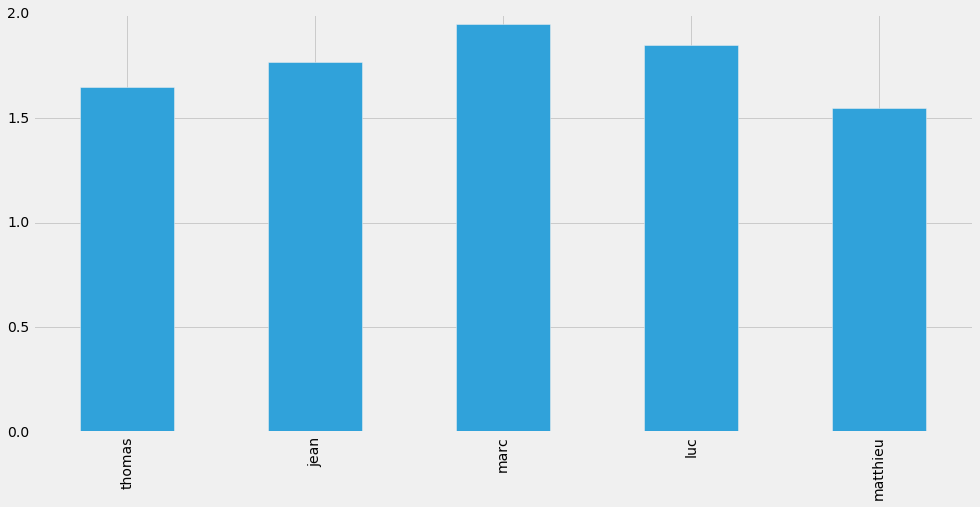

In [38]:
new_df2.loc[:,'height'].plot.bar();

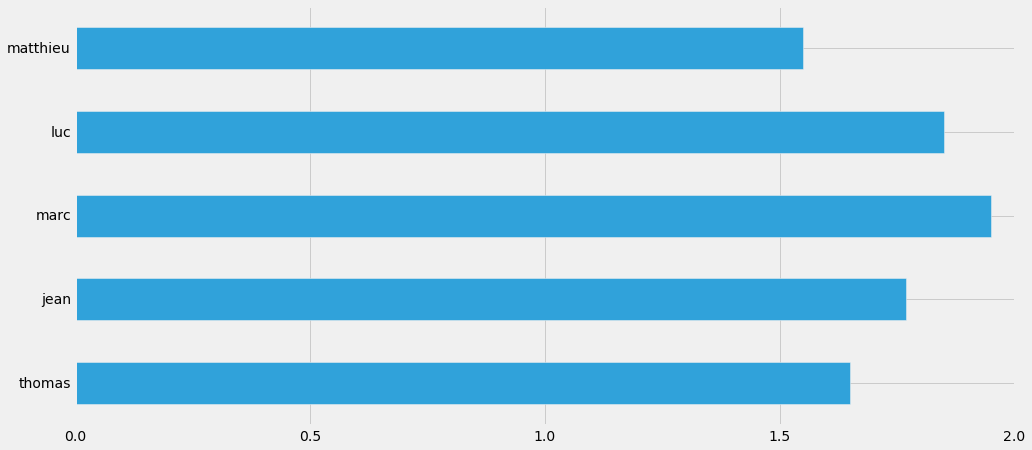

In [39]:
new_df2.loc[:,'height'].plot.barh();

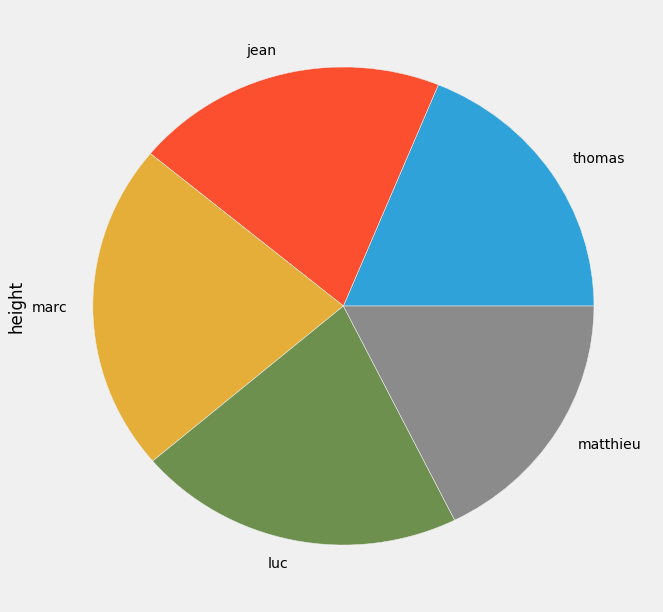

In [40]:
new_df2.loc[:,'height'].plot.pie(figsize=(10,10));

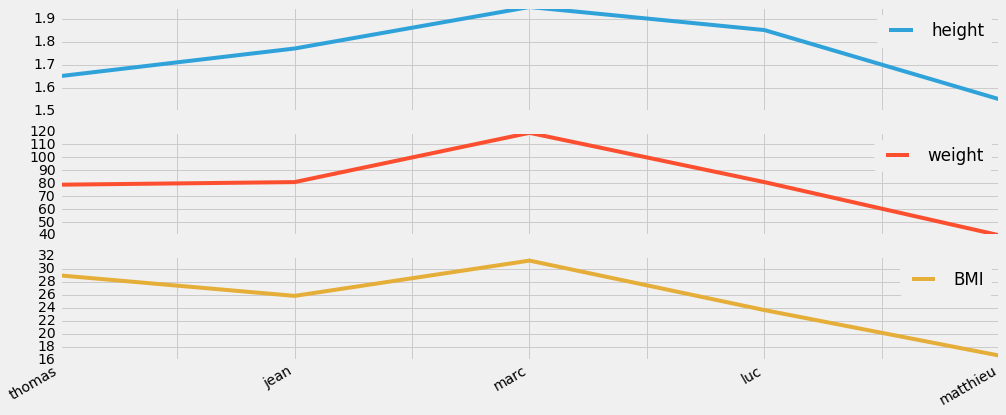

In [41]:
new_df2.plot.line(subplots=True);

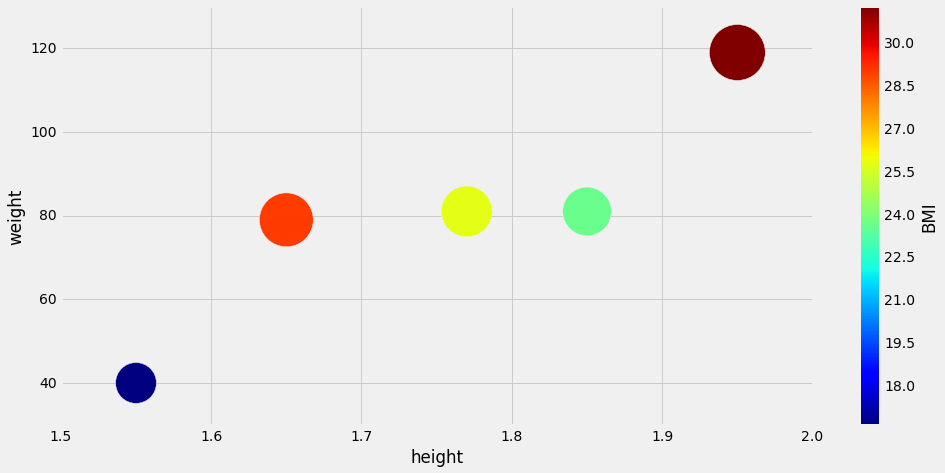

In [42]:
new_df2.plot.scatter(x='height',
                     y='weight',
                     c='BMI',
                     s=100*new_df2.loc[:,'BMI'],
                     colormap='jet');

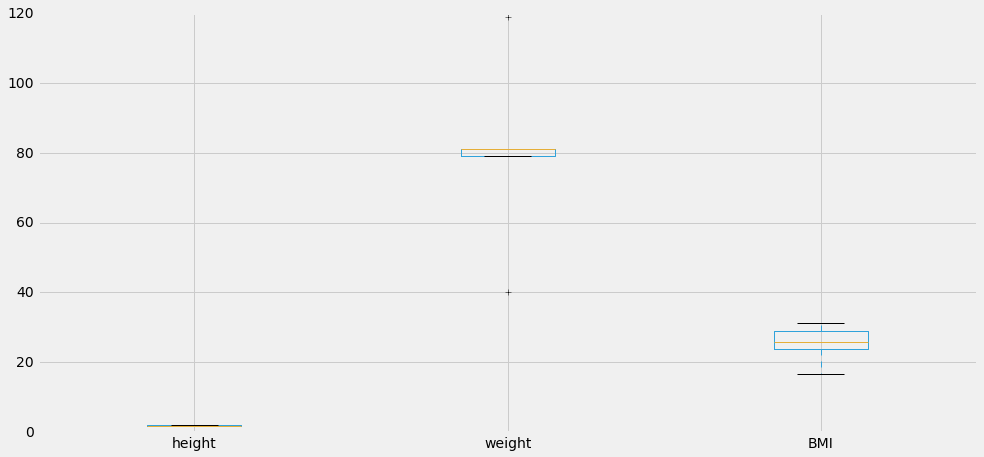

In [43]:
new_df2.plot.box();